In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customers = pd.read_csv("olist_customers.csv")
geolocation = pd.read_csv('olist_geolocation.csv')
order_items = pd.read_csv('olist_order_items.csv')
payments = pd.read_csv('olist_payments.csv')
orders = pd.read_csv('olist_orders.csv')
products = pd.read_csv('olist_products.csv')

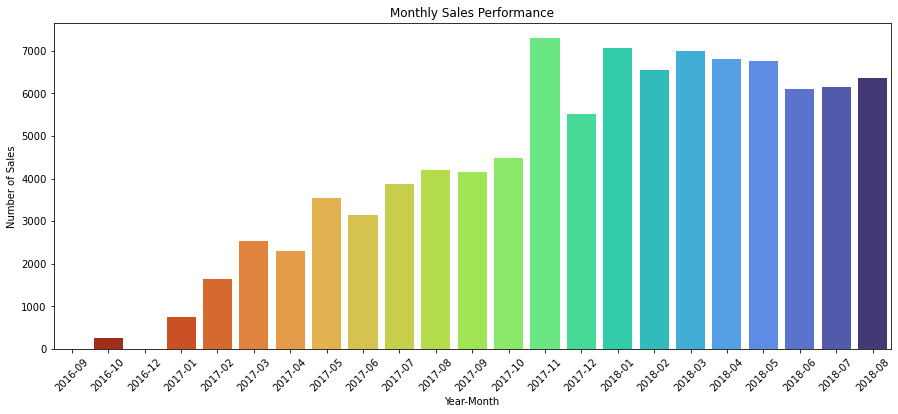

In [11]:
# Convert 'order_purchase_timestamp' to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Extract year and month from the order date
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Group by year and month and calculate total sales for each period
monthly_sales = orders.groupby('year_month')['order_id'].count().reset_index()

# Plotting the bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x='year_month', y='order_id', data=monthly_sales, palette='turbo_r')

# Adding labels and title
plt.xlabel('Year-Month')
plt.ylabel('Number of Sales')
plt.title('Monthly Sales Performance')

# Display the plot
plt.xticks(rotation=45)
plt.show()